<a href="https://colab.research.google.com/github/fatemehziaei/machine-learning/blob/main/fatemehZiaeiMoghaddam_project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import and visualize data
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing()
x,y=housing.data,housing.target
print(x.shape) #visualazing shape
print(x) # visualize x
print("--------------------")
print(y.shape)
print(y)


(20640, 8)
[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]
--------------------
(20640,)
[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [ ]:
# divide data in two group train (80%) and test (20%).
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
print("x_train shape",x_train.shape) #visualazing shape to see if there is any error
print("y_train shape",y_train.shape)
print("x_test shape",x_test.shape)
print("y_test shape",y_test.shape)


x_train shape (16512, 8)
y_train shape (16512,)
x_test shape (4128, 8)
y_test shape (4128,)


In [ ]:
#preprocessing of train and test data using MinMaxScaler and StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
ms = MinMaxScaler()
x_trainm = ms.fit_transform(x_train) # minmax scale normalization of x_train
x_testm = ms.fit_transform(x_test) # minmax scale normalization of x_test
ss = StandardScaler()
x_trains = ss.fit_transform(x_train) # standard scale normalization of x_train
x_tests = ss.fit_transform(x_test) # standard scale normalization of x_test
print("x_trainm shape",x_trains.shape) # checking standard scale normalization of x_train shape
print("x_trainm shape",x_trainm.shape) # checking minmax scale normalization of x_train shape

x_trainm shape (16512, 8)
x_trainm shape (16512, 8)


In [ ]:
# analytical regression on train data preprocess with minmax scale and satndard scale, cost function is MSE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
d=2 # degree
MSE_M=[]
MSE_S=[]
MSE_MT=[]
MSE_ST=[]

for i in range(d): #checking different degrees for polynomial regression
  poly_features = PolynomialFeatures(degree=i+1)
  x_train_polym = poly_features.fit_transform(x_trainm) # building diffrent degrees of x_train normalized with MinMax
  x_test_polym = poly_features.fit_transform(x_testm) # building diffrent degrees of x_test normalized with MinMax
  x_train_polys = poly_features.fit_transform(x_trains) # building diffrent degrees of x_train normalized with Standard
  x_test_polys = poly_features.fit_transform(x_tests) # building diffrent degrees of x_test normalized with Standard
  model = LinearRegression()
  model.fit(x_train_polym,y_train) # fit a line on (y_train,x_train_poly) normalized witj MinMax
  y_predm = model.predict(x_test_polym) # predict y for x_test_poly normalized with MinMax
  y_predm_train = model.predict(x_train_polym) # predict y for x_train_poly normalized with MinMax
  model.fit(x_train_polys,y_train)
  model.fit(x_train_polym,y_train) # fit a line on (y_train,x_train_poly) normalized with Standard
  y_preds = model.predict(x_test_polys)  # predict y for x_test_poly normalized with Standard
  y_preds_train = model.predict(x_train_polys) # predict y for x_train_poly normalized with Standard
  MSE_M.append(mean_squared_error(y_test,y_predm)) # adding MSE for each degree to the list
  MSE_S.append(mean_squared_error(y_test,y_preds))
  MSE_MT.append(mean_squared_error(y_train,y_predm_train))
  MSE_ST.append(mean_squared_error(y_train,y_preds_train))
print("best degree with minmax preprocessing",MSE_M.index(min(MSE_M))+1) # best degree is where MSE is minimum
print("best degree with standard preprocessing",MSE_S.index(min(MSE_S))+1)




best degree with minmax preprocessing 1
best degree with standard preprocessing 1


Best alpha (MinMax batch GD): 1
Best alpha (Standard batch GD): 0.1


Text(0, 0.5, 'MSE_standard')

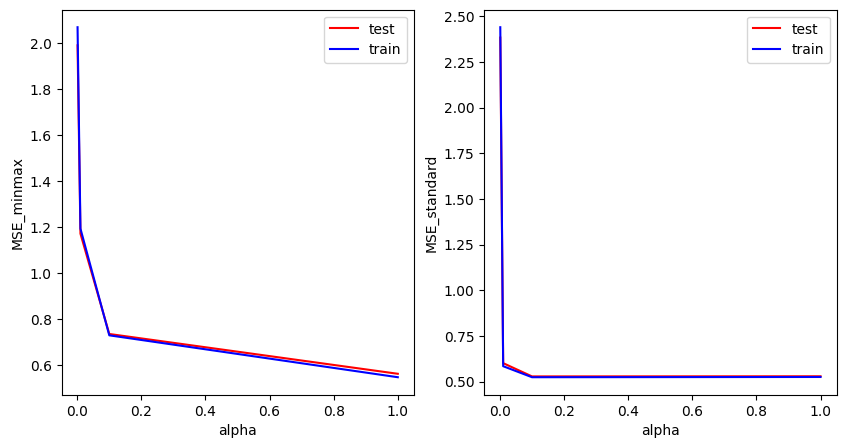

In [ ]:
# regression using gradient descent, calculating MSE for train and test data

def add_one(x): # add a row of one to x at begining
  return np.c_[np.ones((x.shape[0], 1)), x]

def batch_gd_w(x,y,x1,y1,alpha,epochs):# batch gradient descent for linear regression
  n,d=x.shape
#  print(d)
  y= y.reshape(-1,1)
  np.random.seed(0)
  w=np.random.randn(d,1)*0.01 #w initialization
  mse=[]
  mse_test=[]
  for epoch in range(epochs):
    y_pred=x.dot(w)
    gw=(1/n)*(x.T.dot(y_pred-y))
    w=w-alpha*gw
    y_pred_train=x.dot(w)
    y_pred_test=x1.dot(w)
    mse.append(mean_squared_error(y,y_pred_train))
    mse_test.append(mean_squared_error(y1,y_pred_test))
  return w,mse,mse_test # return w, MSE_train and MSE_test for each epoch


# changing alpha to find alpha at minimum MSE of test data

x_trainm1=add_one(x_trainm) #add a row of ones to x_train
x_trains1=add_one(x_trains) #add a row of ones to x_test

epochs = 500
alphas = [0.001,0.01,0.1,1]
MSE_GDmt=[]
MSE_GDst=[]
MSE_GDm=[]
MSE_GDs=[]

for a in alphas: # changing alpha
  wm,MSE_GDmt1,MSE_GDm1=batch_gd_w(x_trainm1,y_train,add_one(x_testm),y_test,a,epochs)
  ind1=np.argmin(MSE_GDm1) # index min MSE with MiniMax for test data
  MSE_GDmt.append(MSE_GDmt1[ind1]) # add MSE of train with index of min_MSE_test MSE for each alpha to a list
  MSE_GDm.append(min(MSE_GDm1))  # add MSE of test with index of min_MSE_test MSE for each alpha to a list

  ws,MSE_GDst1,MSE_GDs1=batch_gd_w(x_trains1,y_train,add_one(x_tests),y_test,a,epochs)
  ind=np.argmin(MSE_GDs1)  # index min MSE with standard for test data
  MSE_GDst.append(MSE_GDst1[ind])
  MSE_GDs.append(min(MSE_GDs1))

# determining best alpha with MiniMax and Standard
best_am=alphas[np.argmin(MSE_GDm)] # best alpha with MiniMax
best_as=alphas[np.argmin(MSE_GDs)] # best alpha with standard
print("Best alpha (MinMax batch GD):", best_am)
print("Best alpha (Standard batch GD):", best_as)

#ploting MSE with MiniMax and Standard vs. alphas for test and train data
fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].plot(alphas,MSE_GDm,c="r",label="test")
ax[0].plot(alphas,MSE_GDmt,c="b",label="train")
ax[1].plot(alphas,MSE_GDs,c="r",label="test")
ax[1].plot(alphas,MSE_GDst,c="b",label="train")
ax[0].legend()
ax[1].legend()
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("MSE_minmax")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("MSE_standard")




best epoch with MiniMAx: 1000
best epoch with standard: 699


Text(0, 0.5, 'MSE_standard')

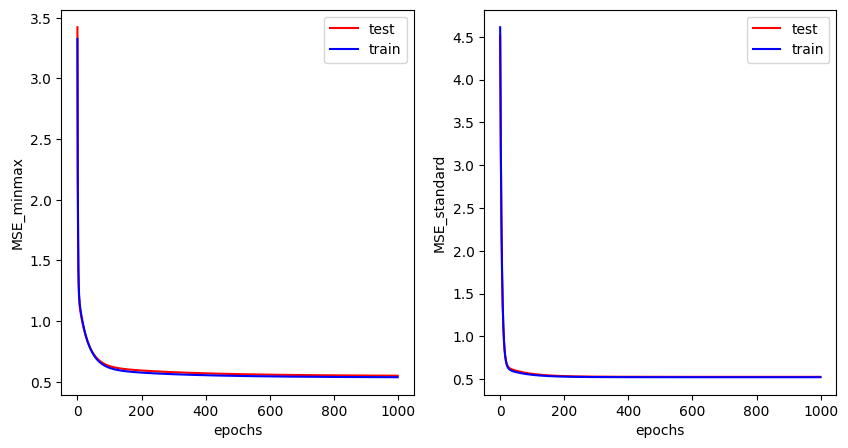

In [ ]:
# changing epoch to find epoch at minimum MSE of test data at constant alpha
epoch =1000 # max number of epochs
alpham = 1
alphas=0.1


wm,MSE_GDmt,MSE_GDm=batch_gd_w(x_trainm1,y_train,add_one(x_testm),y_test,alpham,epoch) # a list of MSE_train_MiniMax with size of max epoch is returned
ws,MSE_GDst,MSE_GDs=batch_gd_w(x_trains1,y_train,add_one(x_tests),y_test,alphas,epoch) # a list of MSE_test_Standard with size of max epoch is returned
indm=np.argmin(MSE_GDm) # index of minimum MSE test with MiniMax
inds=np.argmin(MSE_GDs)  # index of minimum MSE test with Standard
ebm=indm+1
ebs=inds+1
print("best epoch with MiniMAx:",ebm)
print("best epoch with standard:",ebs)

# ploting MSE with MiniMax and Standard vs epochs for train and test data
epochs=range(epoch)
fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].plot(epochs,MSE_GDm,c="r",label="test")
ax[0].plot(epochs,MSE_GDmt,c="b",label="train")
ax[1].plot(epochs,MSE_GDs,c="r",label="test")
ax[1].plot(epochs,MSE_GDst,c="b",label="train")
ax[0].legend()
ax[1].legend()
ax[0].set_xlabel("epochs")
ax[0].set_ylabel("MSE_minmax")
ax[1].set_xlabel("epochs")
ax[1].set_ylabel("MSE_standard")


best batch size: 1


Text(0, 0.5, 'MSE_standard')

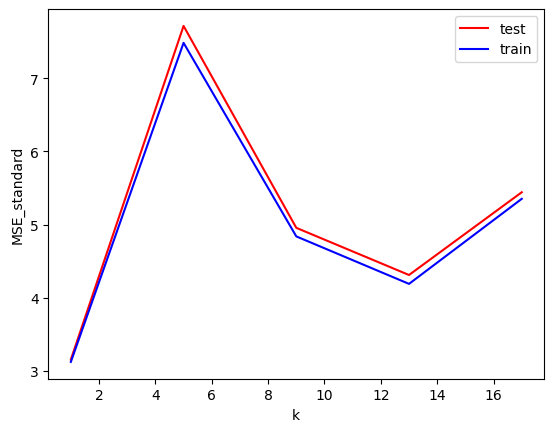

In [ ]:

def minibatch_gd(x,y,x1,y1,alpha,epochs,batch_size):# batch gradient descent for linear regression
  n,d=x.shape
  y= y.reshape(-1,1)
  w=np.random.randn(d,1)
  mse=[]
  mse_test=[]
  for epoch in range(epochs): # change epoch
    for start in range(0, n, batch_size): # iteration
      xb=x[start:(start+batch_size)]
      yb=y[start:(start+batch_size)]
      m = xb.shape[0]
      if m == 0:
        continue
      y_predb=xb.dot(w)
      gw=(1/n)*(xb.T.dot(y_predb-yb))
      w=w-alpha*gw
    y_pred_train=x.dot(w)
    y_pred_test=x1.dot(w)
    mse.append(mean_squared_error(y,y_pred_train))
    mse_test.append(mean_squared_error(y1,y_pred_test))
  return w,mse,mse_test

# determining best batch size with standard normalization
epoch = 500
batch_sizes=range(1,20,4)
alpha = 0.001
MSE_mb_train=[]
MSE_mb=[]

for k in batch_sizes: # changing batch size
  w_sb,MSE_mb1,MSE_mb_train1=minibatch_gd(add_one(x_trains),y_train.reshape(-1,1),add_one(x_tests),y_test.reshape(-1,1),alpha,epoch,k)
  MSE_mb_train.append(MSE_mb_train1[np.argmin(MSE_mb1)]) # adding min MSE of train data for each batch size to a list
  MSE_mb.append(min(MSE_mb1)) # adding min MSE of train data for each batch size to a list

k_best=batch_sizes[np.argmin(MSE_mb)] # finding best batch_size
print("best batch size:",k_best)

# ploting MSE vs batch_size for train and test data
fig,ax=plt.subplots()
ax.plot(batch_sizes,MSE_mb,c="r",label="test")
ax.plot(batch_sizes,MSE_mb_train,c="b",label="train")
ax.legend()
ax.set_xlabel("k")
ax.set_ylabel("MSE_standard")




In [ ]:
int(5.8/3)

1